## Project 1: NYC Resteraunt Violations
### Jacob Minkin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
df = pd.read_csv('../data/Inspection.csv')
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,Census Tract,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,50107551,Zazzys,Manhattan,73,GREENWICH AVENUE,10014.0,6465945909,NaN,1/1/1900,NaN,...,7700.0,1010989.0,1.006140e+09,MN23,NaN,NaN,NaN,NaN,NaN,NaN
1,50131697,NaN,Brooklyn,804,GRAND STREET,11211.0,3478078023,NaN,1/1/1900,NaN,...,49500.0,3069635.0,3.027900e+09,BK90,NaN,NaN,NaN,NaN,NaN,NaN
2,50123820,787 COFFEE,Manhattan,310,WEST 14 STREET,10014.0,9082308846,NaN,1/1/1900,NaN,...,7700.0,1011707.0,1.006290e+09,MN23,NaN,NaN,NaN,NaN,NaN,NaN
3,50119514,PEBBLE BAR,Manhattan,1240,AVE OF TH AMER,NaN,7189098636,NaN,1/1/1900,NaN,...,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50127198,Verdes Italian Eatery,Staten Island,4085,VICTORY BOULEVARD,10314.0,6313030934,NaN,1/1/1900,NaN,...,29102.0,5107399.0,5.027710e+09,SI05,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
names = df.DBA.value_counts().head(20)
names

DUNKIN                                   2541
SUBWAY                                   1520
STARBUCKS                                1098
MCDONALD'S                                944
KENNEDY FRIED CHICKEN                     742
POPEYES                                   623
CROWN FRIED CHICKEN                       614
BURGER KING                               612
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     486
DOMINO'S                                  463
DUNKIN',' BASKIN ROBBINS                  411
CHIPOTLE MEXICAN GRILL                    373
DUNKIN'                                   327
KFC                                       277
WENDY'S                                   264
JOE & THE JUICE                           244
PAPA JOHN'S                               239
CARVEL                                    239
TACO BELL                                 218
CHECKERS                                  215
Name: DBA, dtype: int64

<AxesSubplot:ylabel='BORO'>

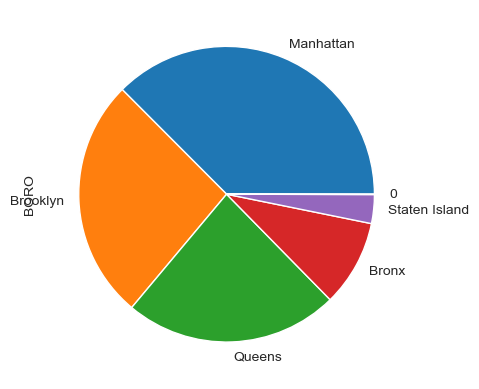

In [12]:
boro = df.BORO.dropna()
boro.describe()
manhattan = sum(df.BORO=='Manhattan')
bronx = sum(df.BORO=='Bronx')

boro.value_counts().plot(kind = 'pie')

<AxesSubplot:>

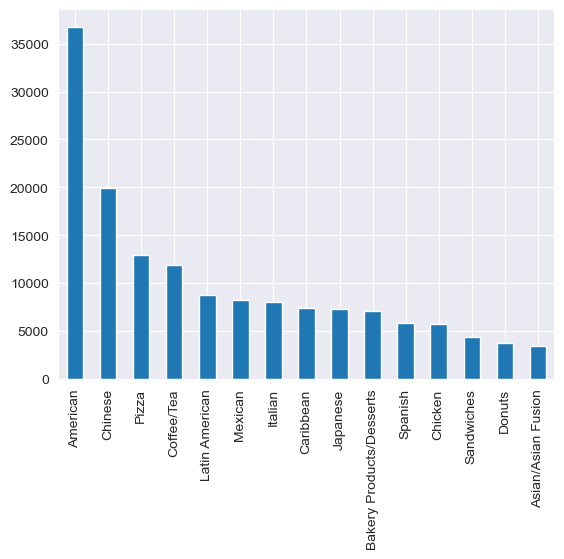

In [13]:
cuisine = df.CUISINE.dropna()
cuisine.value_counts().head(15).plot(kind = 'bar')

In [14]:
violations = df.VIOLATION
violations.value_counts().head(10)

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.    21186
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                 16298
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                                                                     14463
Evidence of mice or live mice present in facility's food and/or non-food areas.                                                                              

In [ ]:
df[df.DBA == "STARBUCKS"]



,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,Census Tract,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
175,50128822,STARBUCKS,Queens,NaN,AIRPORT TERMINAL B,11371.0,2018218189,NaN,1/1/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1861,50015695,STARBUCKS,Brooklyn,341,EASTERN PARKWAY,11216.0,7187780140,Coffee/Tea,11/9/2021,Violations were cited in the following area(s).,...,21900.0,3397468.0,3.012590e+09,BK61,NaN,NaN,NaN,NaN,NaN,NaN
1990,50065956,STARBUCKS,Brooklyn,4,METROTECH CTR,11201.0,6463427139,Coffee/Tea,6/15/2022,Violations were cited in the following area(s).,...,1500.0,3319505.0,3.020590e+09,BK38,NaN,NaN,NaN,NaN,NaN,NaN
2066,41672128,STARBUCKS,Brooklyn,348,FULTON STREET,11201.0,7184881719,Coffee/Tea,7/29/2022,Violations were cited in the following area(s).,...,3700.0,3000418.0,3.001530e+09,BK38,NaN,NaN,NaN,NaN,NaN,NaN
2095,41688653,STARBUCKS,Manhattan,1,PACE PLAZA,10038.0,2123461283,Coffee/Tea,5/1/2019,Violations were cited in the following area(s).,...,1501.0,1001357.0,1.001020e+09,MN25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208309,41180283,STARBUCKS,Manhattan,655,LEXINGTON AVENUE,10022.0,2123085717,Coffee/Tea,10/20/2022,Violations were cited in the following area(s).,...,10000.0,1036487.0,1.013090e+09,MN19,NaN,NaN,NaN,NaN,NaN,NaN
208390,40400739,STARBUCKS,Manhattan,1325,ASTOR PLACE,NaN,2129823563,Coffee/Tea,7/13/2022,Violations were cited in the following area(s).,...,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208771,40938945,STARBUCKS,Manhattan,286,1 AVENUE,10009.0,2123531214,Coffee/Tea,10/29/2021,Violations were cited in the following area(s).,...,4400.0,1082871.0,1.009720e+09,MN50,NaN,NaN,NaN,NaN,NaN,NaN
208786,40982677,STARBUCKS,Manhattan,2,BROADWAY,10004.0,2123444290,Coffee/Tea,10/29/2019,Violations were cited in the following area(s).,...,900.0,1000029.0,1.000110e+09,MN25,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
STARBUCKS = df['DBA'].str.contains('STARBUCKS', regex=False, na=False)
STARBUCKS = df[STARBUCKS]
Sbucks = df[df.DBA == "Starbucks"]
STARBUCKS = pd.concat([STARBUCKS, Sbucks])
STARBUCKS.CUISINE.value_counts()

Coffee/Tea    1455
American         5
Name: CUISINE, dtype: int64

In [26]:
Dunkin = df['DBA'].str.contains('DUNKIN', regex=False, na=False)
Dunkin = df[Dunkin]
#Dbucks = df[df.DBA == "Dunkin"]
#STARBUCKS = pd.concat([STARBUCKS, Sbucks])
Dunkin.CUISINE.value_counts()


Donuts              3489
American             277
Coffee/Tea           160
Chicken               13
Other                 11
Sandwiches            10
Pizza                  8
Eastern European       8
Hotdogs/Pretzels       3
Jewish/Kosher          3
Name: CUISINE, dtype: int64